In [79]:
#importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import accuracy_score
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import SGDRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import BaggingRegressor
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
import joblib

import warnings
warnings.filterwarnings('ignore')

In [80]:
#To print all rows
pd.set_option('display.max_rows',None)

In [81]:
#importing dataset
df = pd.read_csv('Flight.csv') 

#Reading csv file
df.head()

,Unnamed: 0,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0,Spicejet,24/11/2021,Goa,Ahmedabad,08:15,10:25,Non stop,"₹ 5,315"
2,1,Spicejet,24/11/2021,Goa,Ahmedabad,21:05,23:00,Non stop,"₹ 5,315"
3,2,Go First,24/11/2021,Goa,Ahmedabad,14:00,18:35,1 stop via Bengaluru,"₹ 5,315"
4,3,Go First,24/11/2021,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,"₹ 5,315"


# Preprocessing and EDA:

In [82]:
#Checking shape of my dataset
df.shape

(5204, 9)

The dataset has 5204 rows and 9 columns.

In [83]:
# Remove Column 'Unnamed: 0' as it will not affect our dataset

df.drop('Unnamed: 0', axis = 1, inplace = True)

df.head()

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Spicejet,24/11/2021,Goa,Ahmedabad,08:15,10:25,Non stop,"₹ 5,315"
2,Spicejet,24/11/2021,Goa,Ahmedabad,21:05,23:00,Non stop,"₹ 5,315"
3,Go First,24/11/2021,Goa,Ahmedabad,14:00,18:35,1 stop via Bengaluru,"₹ 5,315"
4,Go First,24/11/2021,Goa,Ahmedabad,13:15,20:25,1 stop via Mumbai,"₹ 5,315"


Removed Unnamed: 0 column as it is the index column of file.

In [84]:
#Removing the row with NaN values

df = df.drop([df.index[0]])

As we have entries in first row as NaN hence dropped this row.

In [85]:
# Equalizing Price column

df.Price = df.Price.str.replace('[^0-9.]','').astype('float64')

df.Price

1        5315.0
2        5315.0
3        5315.0
4        5315.0
5        5315.0
6        5315.0
7        5315.0
8        5315.0
9        5315.0
10       5315.0
11       5316.0
12       5316.0
13       5316.0
14       5316.0
15       5316.0
16       5773.0
17       5893.0
18       7899.0
19       8057.0
20       8057.0
21       8527.0
22       8633.0
23       8634.0
24       5315.0
25       5315.0
26       5315.0
27       5315.0
28       5315.0
29       5315.0
30       5315.0
31       5315.0
32       5316.0
33       5316.0
34       5316.0
35       5316.0
36       5316.0
37       5316.0
38       5316.0
39       5316.0
40       5773.0
41       6686.0
42       8213.0
43       8214.0
44       8215.0
45       8371.0
46       8465.0
47       8737.0
48       5315.0
49       5315.0
50       5315.0
51       5315.0
52       5316.0
53       5316.0
54       5316.0
55       5316.0
56       5316.0
57       5316.0
58       5316.0
59       5316.0
60       5316.0
61       5316.0
62       5736.0
63      

Changed the price column datatype to float.

In [86]:
#Checking all column names

df.columns

Index(['Airline', 'Journey_date', 'From', 'To', 'Dtime', 'Atime', 'Stops',
       'Price'],
      dtype='object')

We can see the column names of the dataset.

In [87]:
# Check the data types of columns

df.dtypes

Airline          object
Journey_date     object
From             object
To               object
Dtime            object
Atime            object
Stops            object
Price           float64
dtype: object

Except Price all other columns are object type datas. But we need to convert journey_date, d_time and a_time columns from object to datetime datatype.

In [88]:
#Checking the info of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5203 entries, 1 to 5203
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Airline       5203 non-null   object 
 1   Journey_date  5203 non-null   object 
 2   From          5203 non-null   object 
 3   To            5203 non-null   object 
 4   Dtime         5203 non-null   object 
 5   Atime         5203 non-null   object 
 6   Stops         5203 non-null   object 
 7   Price         5203 non-null   float64
dtypes: float64(1), object(7)
memory usage: 365.8+ KB


In [89]:
#Checking for any unexpected and unwanted entries present in the column.

for i in df.columns:
        print(df[i].value_counts())
        print('------------------------------')

IndiGo                 1767
Go First               1457
AirAsia                 512
Air India               474
Spicejet                408
Vistara                 375
Spicejet, IndiGo         35
Air India, IndiGo        16
Spicejet, AirAsia        13
IndiGo, Air India        12
AirAsia, IndiGo          11
IndiGo, Spicejet         11
IndiGo, Go First         10
IndiGo, TruJet            9
Vistara, IndiGo           9
Spicejet, Air India       8
Air India, Go First       7
Vistara, Spicejet         6
Go First, IndiGo          5
Air India, AirAsia        5
IndiGo, AirAsia           5
Vistara, Go First         5
Spicejet, Go First        5
IndiGo, Vistara           4
TruJet, IndiGo            4
Spicejet, Vistara         4
TruJet                    4
Star Air                  4
Air India, Spicejet       3
AirAsia, Go First         3
Go First, AirAsia         2
Vistara, Air India        2
Vistara, AirAsia          2
Go First, Air India       1
Vistara, TruJet           1
Air India, Vistara  

Above are the value counts of each column. We will group Airline & Stops columns to better understand the feature.

In [90]:
#Group the Airlines column for multiple airlines

df['Airline'].replace(('Spicejet, IndiGo','Air India, IndiGo','Spicejet, AirAsia','IndiGo, Air India','IndiGo, Spicejet','AirAsia, IndiGo','IndiGo, Go First','IndiGo, TruJet','Vistara, IndiGo','Spicejet, Air India','Air India, Go First','Vistara, Spicejet','Spicejet, Go First','Go First, IndiGo','IndiGo, AirAsia','Air India, AirAsia','Vistara, Go First','TruJet, IndiGo','Spicejet, Vistara','IndiGo, Vistara','Air India, Spicejet','AirAsia, Go First','Vistara, AirAsia','Vistara, Air India','Go First, AirAsia','Spicejet, TruJet','Vistara, TruJet','AirAsia, TruJet','Go First, Air India','Go First, Spicejet','Air India, Vistara'),'Multiple Airlines',inplace=True)

In [91]:
# Check the value counts of Airline column

df.Airline.value_counts()

IndiGo               1767
Go First             1457
AirAsia               512
Air India             474
Spicejet              408
Vistara               375
Multiple Airlines     202
TruJet                  4
Star Air                4
Name: Airline, dtype: int64

In [92]:
# Group the Stops columns

df['Stops'].replace(('1 stop via Mumbai','1 stop via Hyderabad','1 stop via Bengaluru','1 stop via New Delhi','1 stop via Ahmedabad','1 stop via Goa','1 stop via Pune','1 stop via Lucknow','1 stop via Ranchi','1 stop via Kolkata','1 stop via Chennai','1 stop via Chandigarh','1 stop via Kochi','1 stop via Jaipur','1 stop via Nagpur','1 stop via Amritsar','1 stop via Patna','1 stop via Surat','1 stop via Guwahati','1 stop via Vadodara','1 stop via Udaipur','1 stop via Indore','1 stop via Bhavnagar','1 stop via Madurai','1 stop via Bagdogra','1 stop via Varanasi','1 stop via Srinagar','1 stop via Mangalore','1 stop via Jammu','1 stop via Vijayawada','1 stop via Jodhpur','1 stop via Kalaburagi','1 stop via Aurangabad','1 stop via Rajkot','1 stop via Mysore','1 stop via Bhopal','1 stop via Tirupati','1 stop via Dehradun','1 stop via Visakhapatnam'),'1 Stop',inplace=True)

In [93]:
# Group the Stops columns

df['Stops'].replace(('2 stop via New Delhi,Hyderabad','2 stop via Hyderabad,New Delhi','2 stop via Mumbai,Hyderabad','2 stop via Mumbai,New Delhi','2 stop via Hyderabad,Mumbai','2 stop via Bengaluru,Hyderabad','2 stop via Hyderabad,Bengaluru','2 stop via New Delhi,Mumbai','2 stop via Varanasi,Bengaluru','2 stop via New Delhi,Chandigarh','2 stop via Chandigarh,New Delhi','2 stop via Chandigarh,Ahmedabad','2 stop via Ranchi,New Delhi','2 stop via Ranchi,Bengaluru','2 stop via Ahmedabad,Chandigarh','2 stop via Chandigarh,Srinagar','2 stop via Bengaluru,Ranchi','2 stop via Jammu,Srinagar','2 stop via Kochi,Mumbai','2 stop via New Delhi,Varanasi','2 stop via Hyderabad,Mysore','2 stop via Mumbai,Ranchi','2 stop via Chennai,Ranchi','2 stop via Hyderabad,Pune','2 stop via Nagpur,Pune','2 stop via Chennai,Hyderabad','2 stop via Pune,Hyderabad','2 stop via Hyderabad,Nanded','2 stop via Vijayawada,Hyderabad','2 stop via Hyderabad,Goa','2 stop via Nanded,Hyderabad','2 stop via Mumbai,Chandigarh','2 stop via Belgaum,Hyderabad','2 stop via Chennai,Jaipur','2 stop via Hyderabad,Chennai','2 stop via Hyderabad,Tirupati','2 stop via Srinagar,Chandigarh','2 stop via Mangalore,Mumbai','2 stop via Amritsar,Srinagar','2 stop via Goa,Hyderabad','2 stop via Mysore,Hyderabad'),'2 Stops',inplace=True)

In [94]:
# Group the Stops columns

df['Stops'].replace(('3 stop via Goa,New Delhi,Hyderabad','3 stop via Mumbai,Aurangabad,New Delhi','3 stop via Chandigarh,New Delhi,Ranchi','3 stop via New Delhi,Aurangabad,Mumbai','3 stop via Leh,Jammu,Srinagar','3 stop via Bhubaneswar,New Delhi,Hyderabad','3 stop via Hyderabad,New Delhi,Mumbai','3 stop via Indore,Hyderabad,Mumbai','3 stop via Hyderabad,New Delhi,Jaipur','3 stop via Hyderabad,New Delhi,Goa','3 stop via Ahmedabad,New Delhi,Hyderabad','3 stop via Belgaum,Hyderabad,Mumbai','3 stop via Hyderabad,New Delhi,Bhopal','3 stop via Mumbai,New Delhi,Hyderabad'),'3 Stops',inplace=True)

In [95]:
# Group the Stops columns

df['Stops'].replace(('4 stop via Bhubaneswar,Surat,New Delhi,Hyderabad'),'4 Stops',inplace=True)

In [96]:
# Check the value counts of Stops columns

df.Stops.value_counts()

1 Stop      2533
Non stop    2285
2 Stops      348
3 Stops       36
4 Stops        1
Name: Stops, dtype: int64

In [97]:
# Let's assign values for Stops columns

df.replace({'Non stop': 0,'1 Stop': 1,'2 Stops': 2,'3 Stops': 3,'4 Stops': 4},inplace = True)

In [98]:
# Check the value counts of Stops columns again

df.Stops.value_counts()

1    2533
0    2285
2     348
3      36
4       1
Name: Stops, dtype: int64

Now Stops column is set for our analysis.

In [99]:
# Check null values in Dataset

print('Empty cells in Dataset is ',df.isna().values.any())

print('\nColumnwise Empty cell analysis\n')

print(df.isna().sum())

Empty cells in Dataset is  False

Columnwise Empty cell analysis

Airline         0
Journey_date    0
From            0
To              0
Dtime           0
Atime           0
Stops           0
Price           0
dtype: int64


No NaN or Null values present in the dataset.

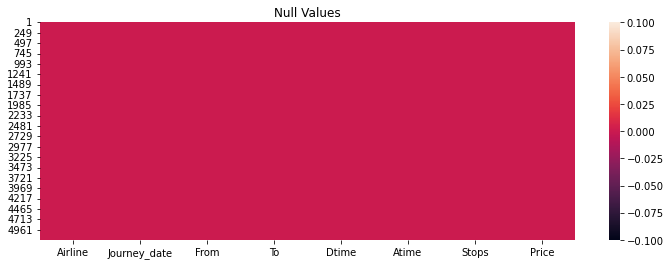

In [100]:
# Visualise null values through Heatmp

plt.figure(figsize = [12, 4])

sns.heatmap(df.isnull())

plt.title('Null Values')

plt.show()

From above we can clearly see that there is no null values in the dataset.

In [101]:
# Check for empty observations

df.loc[df['Price'] == ' ']

,Airline,Journey_date,From,To,Dtime,Atime,Stops,Price


There are no empty observations in target column.

# Feature Extraction

In [102]:
# Convert object data type to datetime in Journey_date column 

df['Journey_date'] =  pd.to_datetime(df['Journey_date'])

In [103]:
#Extracting Journey year, month and day from Journey_date

#Extract year
df['Journey_year'] = pd.to_datetime(df.Journey_date, format = '%Y/%m/%d').dt.year

#Extract month
df['Journey_mon'] = pd.to_datetime(df.Journey_date, format = '%Y/%m/%d').dt.month

#Extract day
df['Journey_day'] = pd.to_datetime(df.Journey_date, format = '%Y/%m/%d').dt.day

In [104]:
# valuecount of Journey_year column

df.Journey_year.value_counts()

2021    5203
Name: Journey_year, dtype: int64

Since all the entries in Journey_year column are same i.e 2021 let's drop as it will not help in our analysis.

In [105]:
# Drop Journey_year column

df = df.drop(['Journey_year'], axis = 1)

In [106]:
# Valuecount of Journey_mon column

df.Journey_mon.value_counts()

11    5203
Name: Journey_mon, dtype: int64

Since all the entries in Journey_mon column are same i.e 11 let's drop as it will not help in our analysis.

In [107]:
# Drop Journey_mon column

df = df.drop(['Journey_mon'], axis = 1)

In [108]:
# Valuecount of Journey_year column

df.Journey_day.value_counts()

29    798
30    765
24    761
27    742
25    740
26    718
28    679
Name: Journey_day, dtype: int64

In [109]:
# Drop Journey_date column

df = df.drop(['Journey_date'], axis = 1)

Dropping Journey_date column after extracting required information.

In [110]:
# Convert object data type into datetime

df['Dtime'] =  pd.to_datetime(df['Dtime'])

df['Atime'] =  pd.to_datetime(df['Atime'])

In [111]:
# Check datatypes of all columns again
df.dtypes

Airline                object
From                   object
To                     object
Dtime          datetime64[ns]
Atime          datetime64[ns]
Stops                   int64
Price                 float64
Journey_day             int64
dtype: object

The data type has changed now.

In [112]:
#Extracting hours and minutes from Dtime

#Extracting Hours
df['Dhour'] = pd.to_datetime(df['Dtime']).dt.hour

#Extracting Hours
df['DMin'] = pd.to_datetime(df['Dtime']).dt.minute

In [113]:
# Drop Dep_Time column

df = df.drop(['Dtime'], axis = 1)

In [114]:
#Extracting hours and minutes from Arrival_Time

#Extracting Hours
df['AHour'] = pd.to_datetime(df['Atime']).dt.hour

#Extracting Hours
df['AMin'] = pd.to_datetime(df['Atime']).dt.minute

In [115]:
# Drop Arrival_Time column

df = df.drop(['Atime'], axis = 1)

In [116]:
# Check the datatypes of all columns
df.dtypes

Airline         object
From            object
To              object
Stops            int64
Price          float64
Journey_day      int64
Dhour            int64
DMin             int64
AHour            int64
AMin             int64
dtype: object

This is the datatypes after extraction and preprocessing.

In [117]:
# Check description of data set

df.describe()

,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
count,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000,5203.000000
mean,0.642130,6846.891601,27.017106,12.517970,24.955795,13.152989,27.685950
std,0.638332,2509.772290,2.022627,6.335777,18.153357,6.832345,16.896847
min,0.000000,3429.000000,24.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,5114.000000,25.000000,7.000000,10.000000,8.000000,10.000000
50%,1.000000,5955.000000,27.000000,12.000000,25.000000,13.000000,30.000000
75%,1.000000,7624.000000,29.000000,18.000000,40.000000,19.000000,40.000000
max,4.000000,31147.000000,30.000000,23.000000,55.000000,23.000000,55.000000


The statistics of the dataset is as above. The mean and the 2nd quantile values are almost same so there are no extreme outliers present.

# Visualization:

# Univariate Analysis:

In [118]:
# check for categorical columns

categorical_columns = []
for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        categorical_columns.append(i)
print(categorical_columns)

['Airline', 'From', 'To']


Above are the categorical columns in the data set.

In [119]:
# Now check for numerical columns

numerical_columns = []

for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
print(numerical_columns)

['Stops', 'Price', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']


Above are the numerical columns in the data set.

# Univariate analysis for numerical columns:

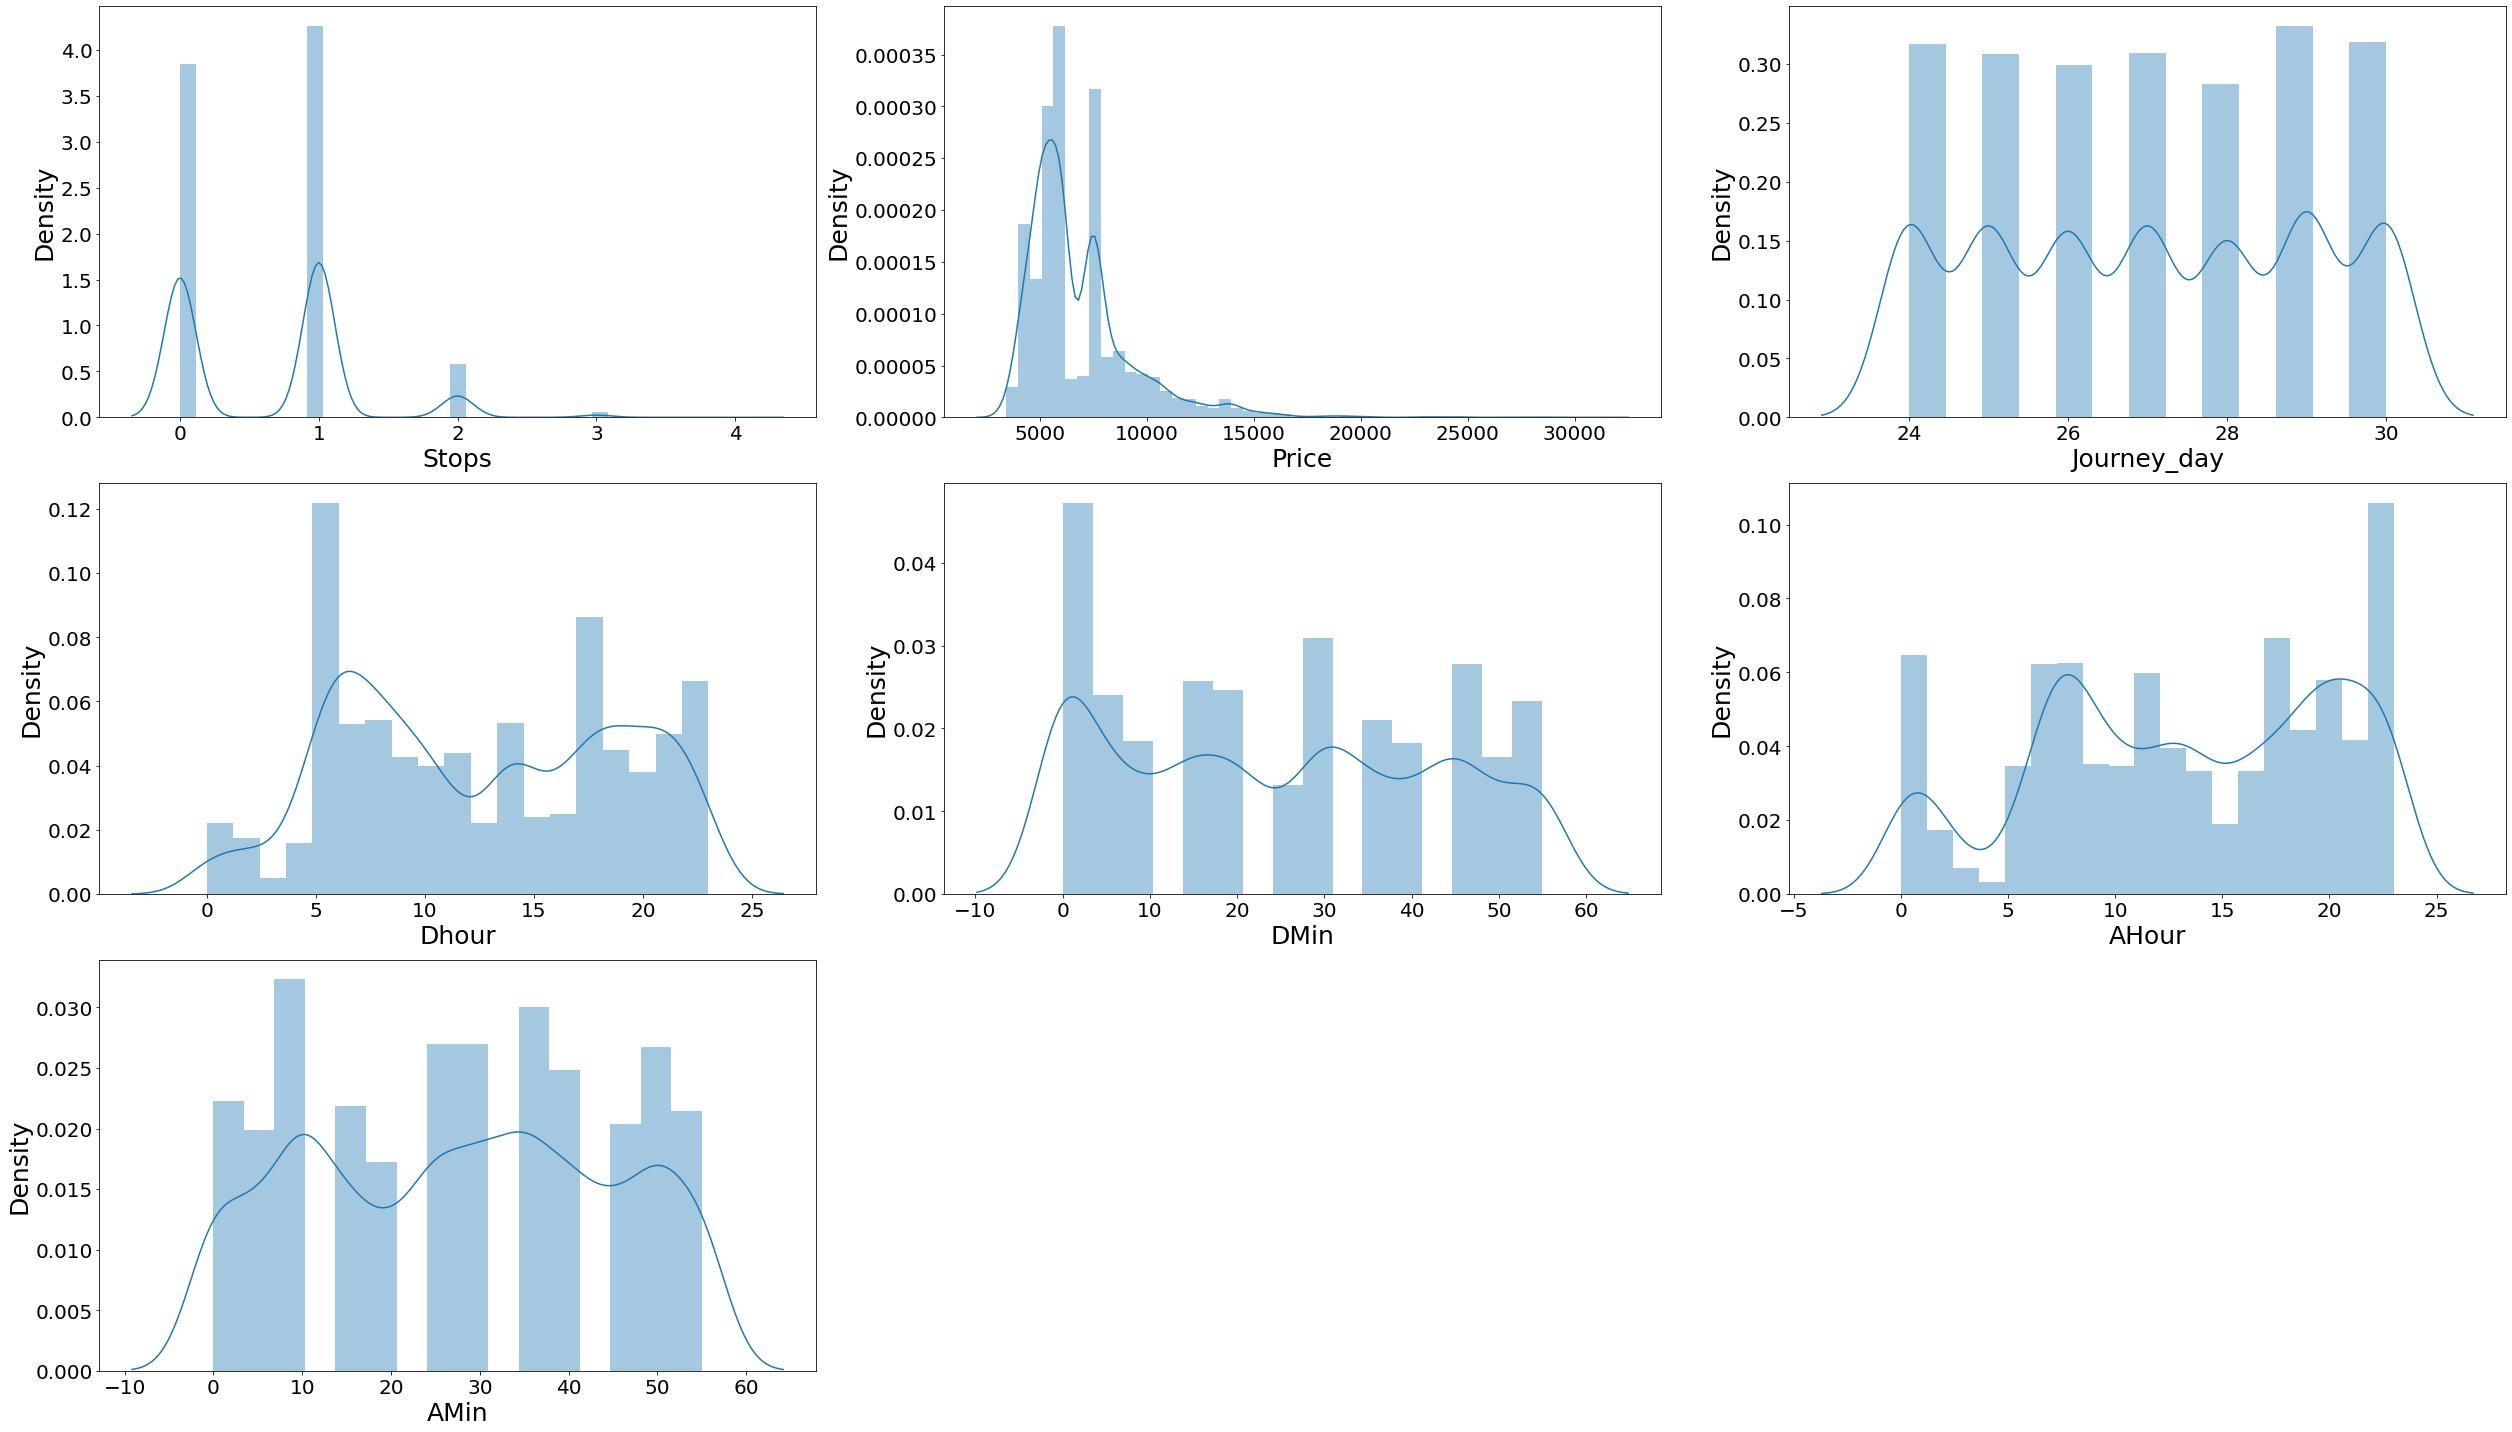

In [120]:
# Distribution plot for all numerical columns

plt.figure(figsize = (35, 20))

plotnumber = 1

for column in df[numerical_columns]:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column, fontsize = 25)
        plt.ylabel('Density', fontsize = 25)
        plt.xticks(fontsize = 20)  
        plt.yticks(fontsize = 20)
    plotnumber += 1
plt.tight_layout()

There is no skewness in any of the numerical columns.

# Univariate Analysis for categorical columns

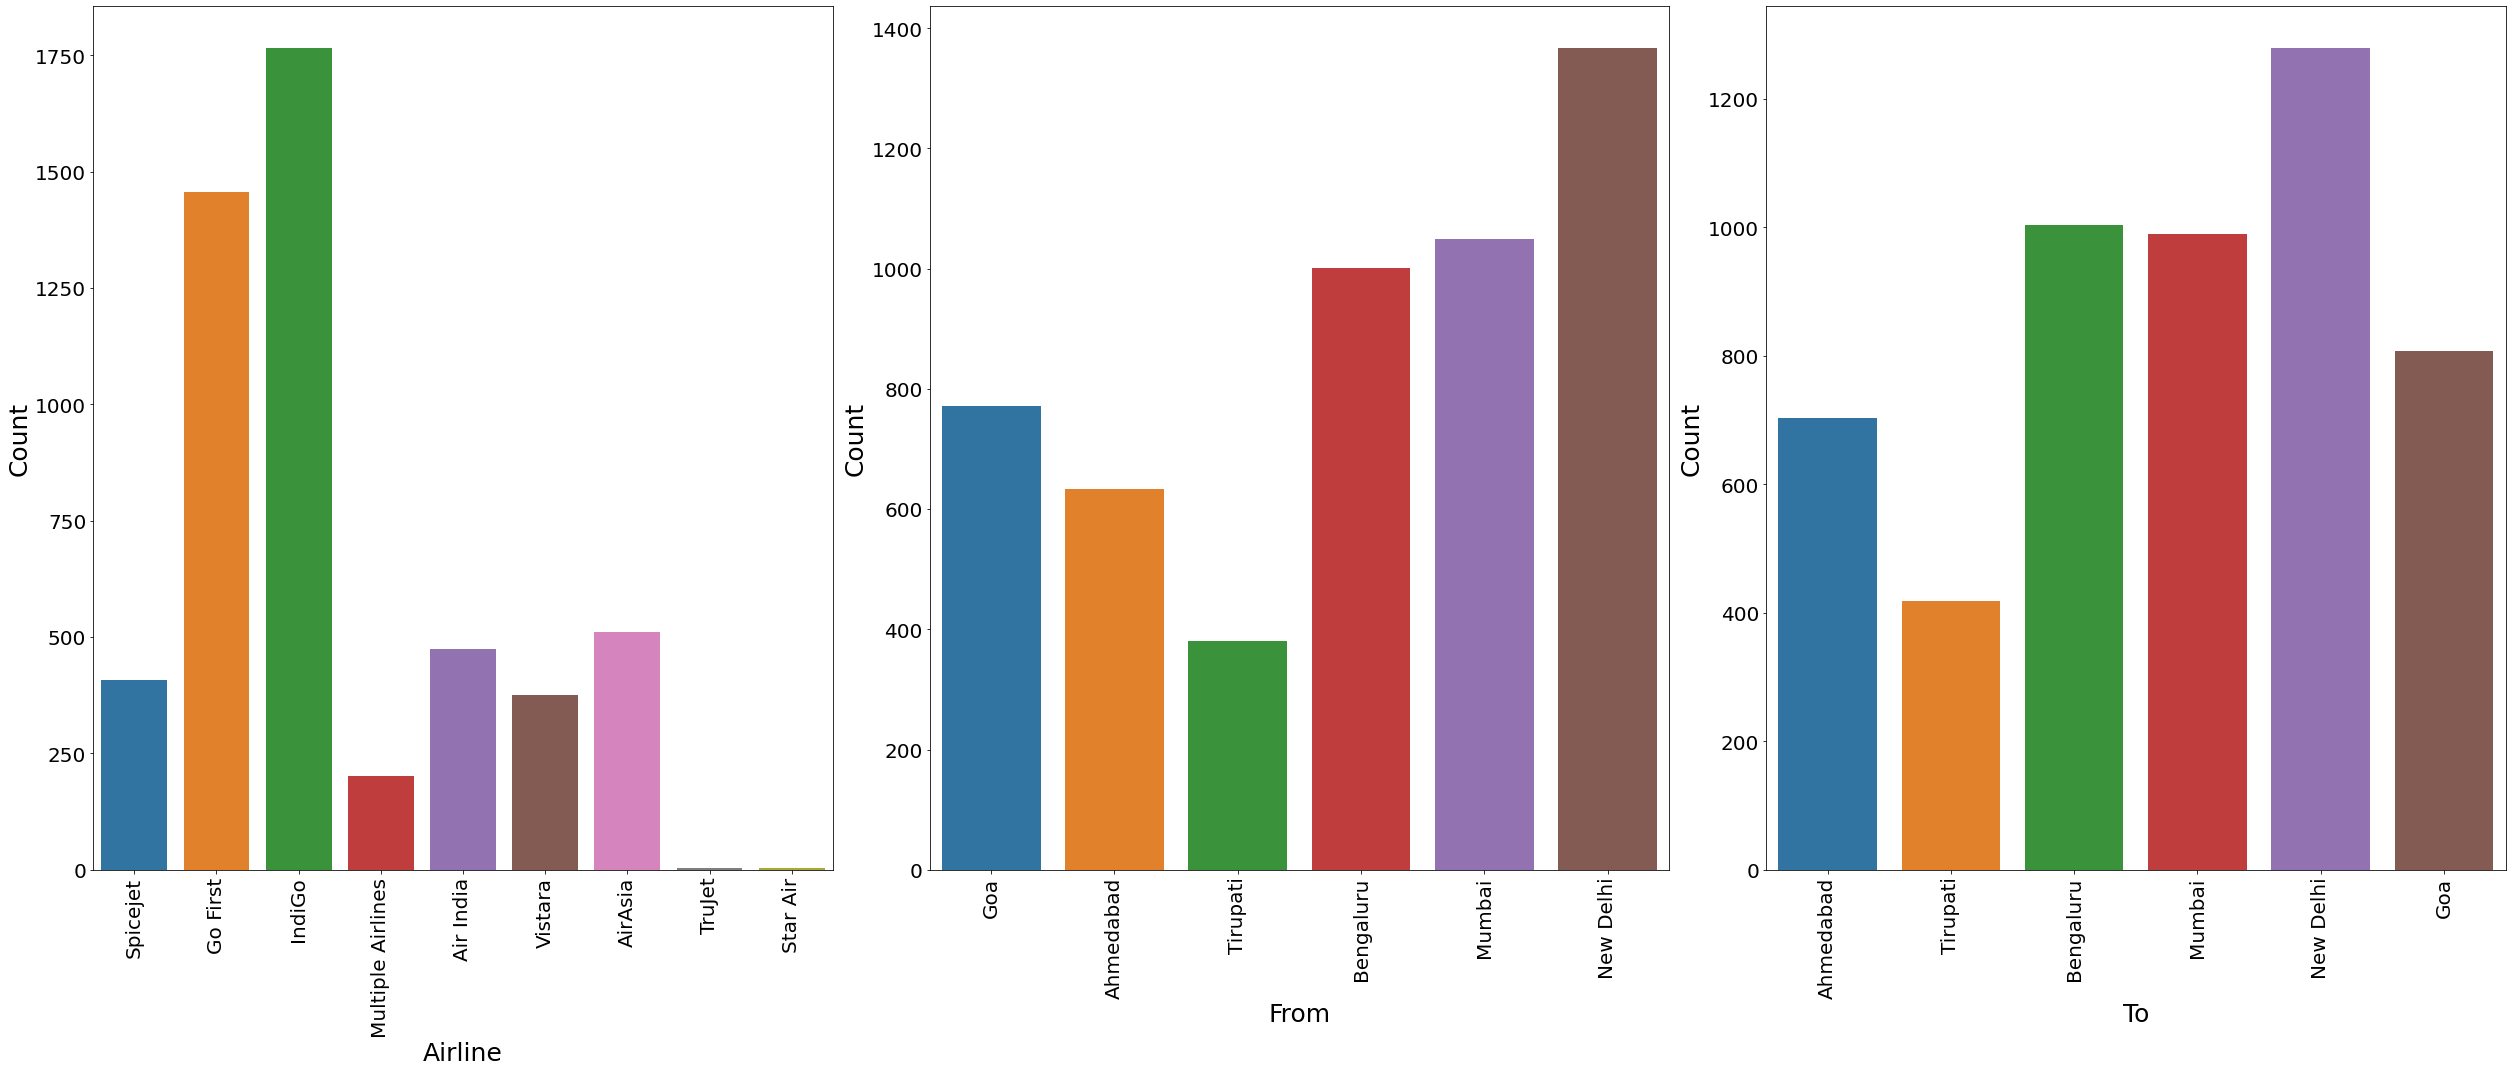

In [121]:
# Plot for all Categorical columns

plt.figure(figsize = (35, 15))

plotnumber = 1

for column in df[categorical_columns]:
    if plotnumber <=3:
        ax = plt.subplot(1, 3, plotnumber)
        sns.countplot(df[column])
        plt.xlabel(column, fontsize = 25)
        plt.ylabel('Count', fontsize = 25)
        plt.xticks(rotation = 90, fontsize = 20)  
        plt.yticks(fontsize = 20)
    plotnumber += 1
plt.tight_layout()

Indigo has maximum count which means most of the passengers preferred Indigo for there travelling.
New Delhi has maximum count for source as well as maximum count for Destination too which means maximum passengers are choosing New Delhi as there Source & Destination.

# Bivariate Analysis:

In [122]:
col = ['Stops', 'Journey_day', 'Dhour', 'DMin', 'AHour', 'AMin']

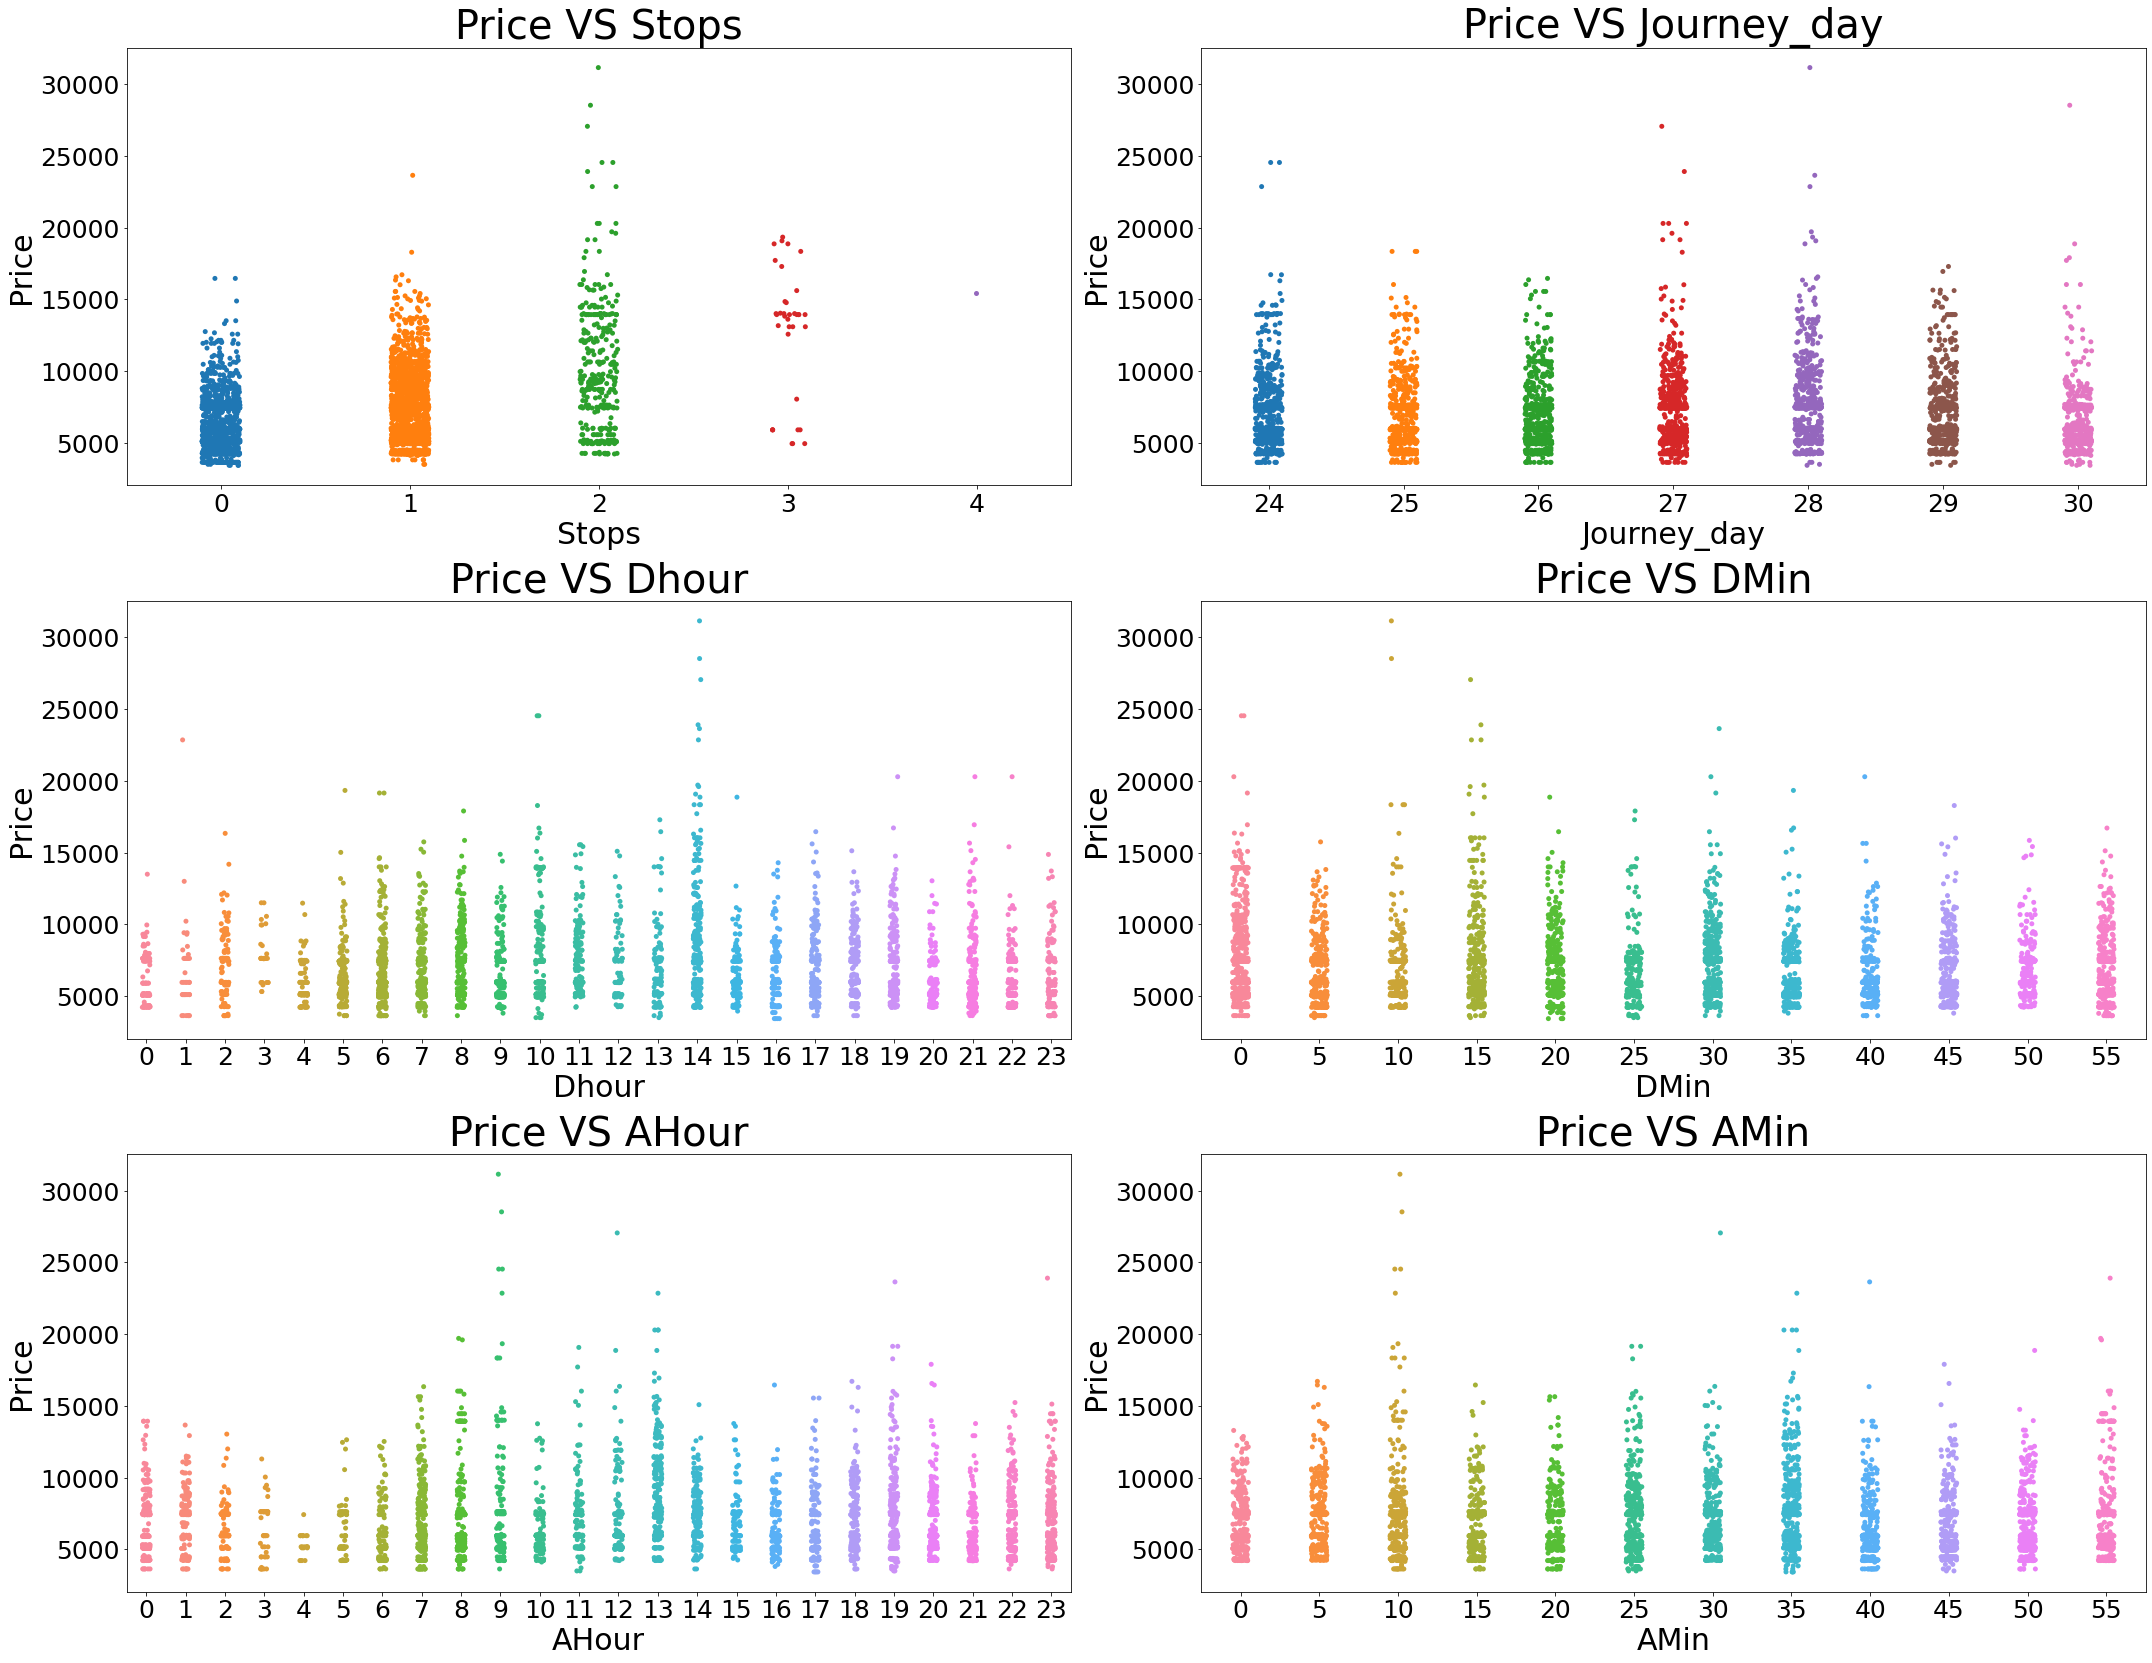

In [123]:
# stripplot for numerical columns

plt.figure(figsize = (30, 30))

for i in range(len(col)):
    plt.subplot(4, 2, i+1)
    sns.stripplot(x = df[col[i]] , y = df['Price'])
    plt.title(f'Price VS {col[i]}', fontsize = 40)
    plt.xticks(fontsize = 25)  
    plt.yticks(fontsize = 25)
    plt.xlabel(col[i], fontsize = 30)
    plt.ylabel('Price', fontsize = 30)
    plt.tight_layout()

Observations:

Flights with 2 stops costs more compared to other flights.

At all the dates the price is almost same.

At 2PM departure time of every day the flight Prices are high so it looks good to book flights rather than this departure 
time.

And Departure minute has less relation with target Price.

7AM to 1PM Arrival time of every day the flight Prices are high so it looks good to book flights before or after than this arrival time.

And Arrival minute has less relation with target Price.

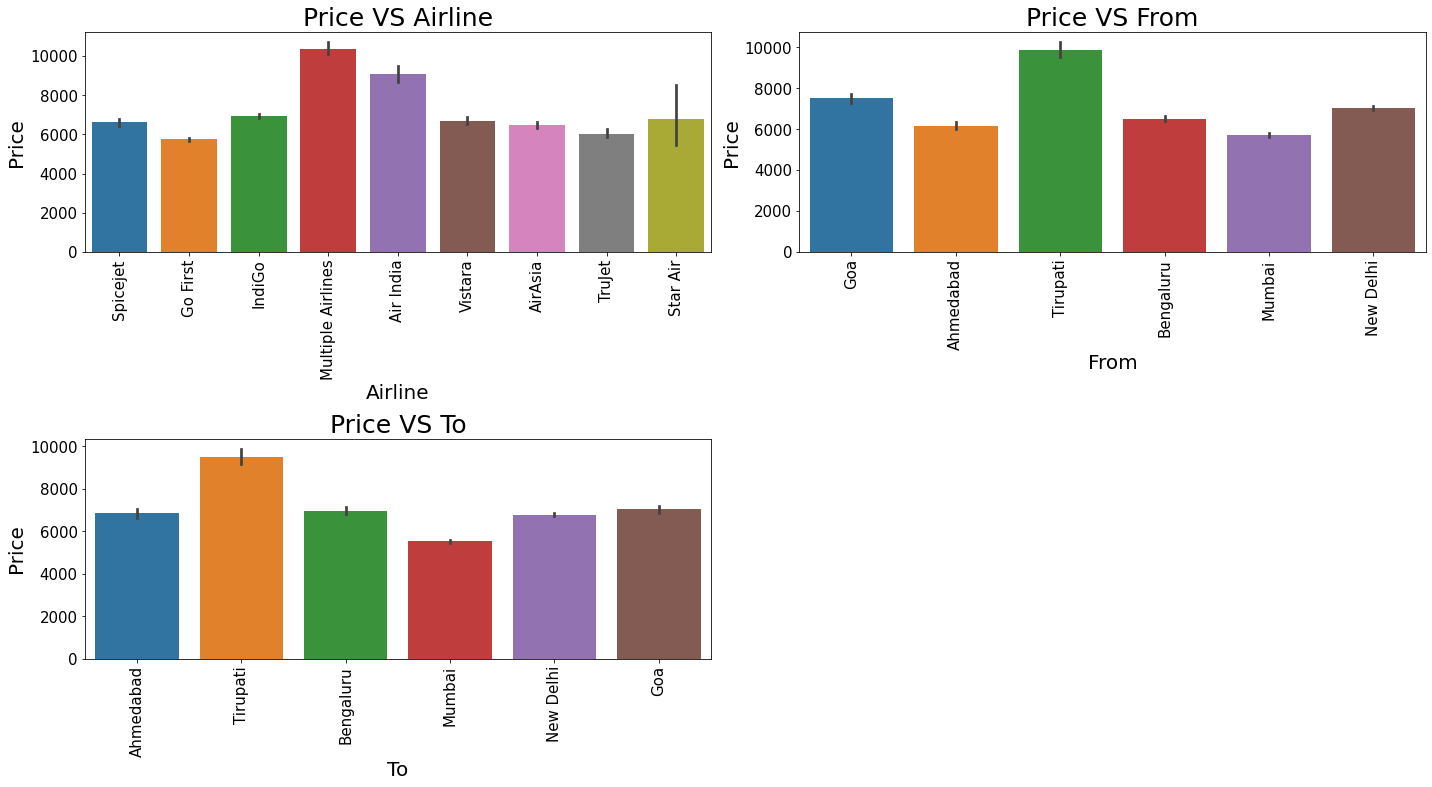

In [124]:
# Bar plot for all categorical columns

plt.figure(figsize = (20, 15))

for i in range(len(categorical_columns)):
    plt.subplot(3, 2, i+1)
    sns.barplot(y = df['Price'], x = df[categorical_columns[i]])
    plt.title(f'Price VS {categorical_columns[i]}', fontsize = 25)
    plt.xticks(rotation = 90, fontsize = 15)  
    plt.yticks(rotation = 0, fontsize =15)
    plt.xlabel(categorical_columns[i], fontsize = 20)
    plt.ylabel('Price', fontsize = 20)
    plt.tight_layout()

Observations:

For Multiple Airlines the Price is high compared to other Airlines.

Taking Tirupati as Source costs highest Price Compared to other Source points.

Taking Tirupati as Destination costs highest Price Compared to other Destination points.

# Multivariate Analysis:

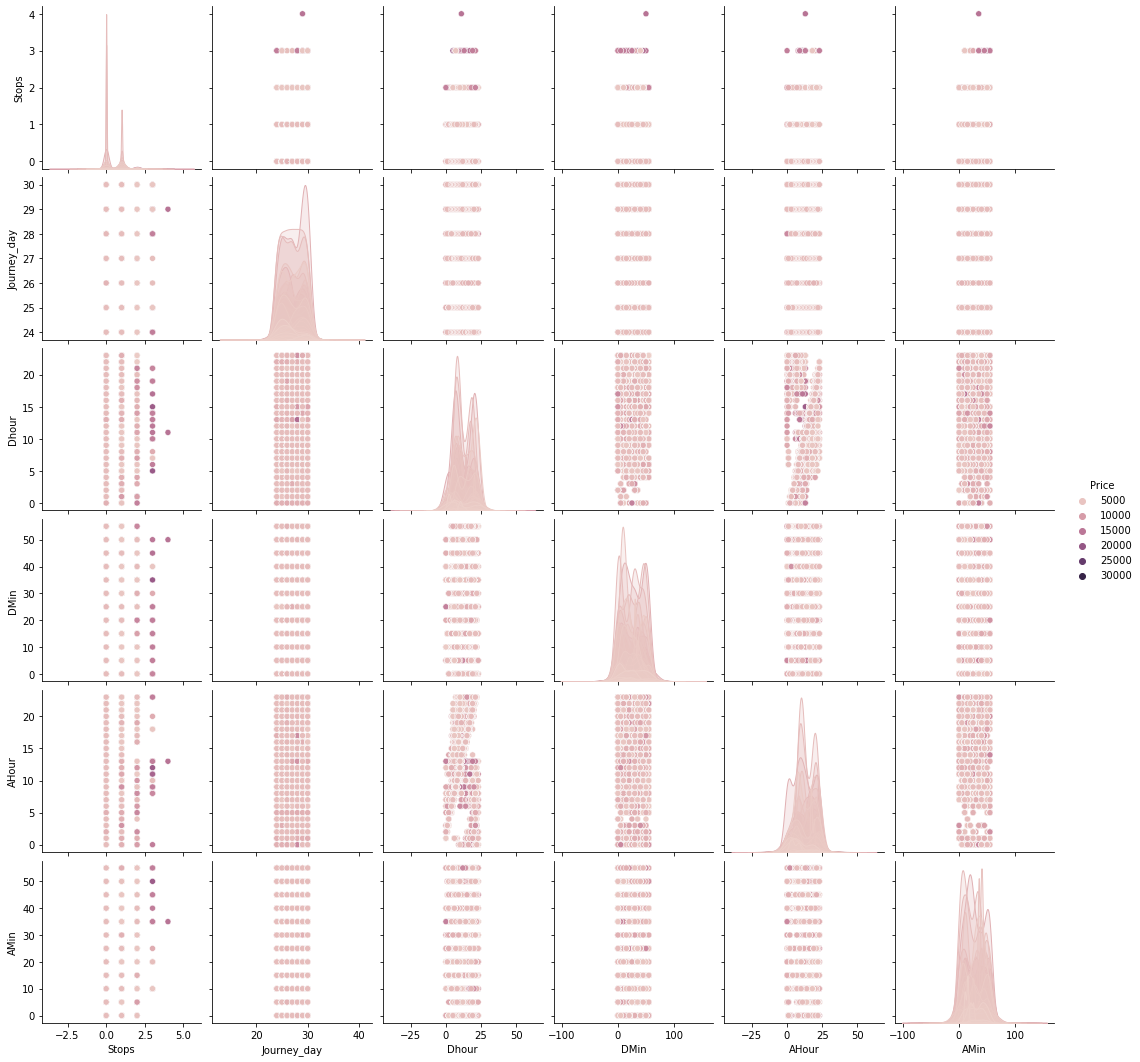

In [125]:
# pair ploting for df

sns.pairplot(df, hue = 'Price')

Above are the pair plots of each pair of features.

# Checking for outliers:

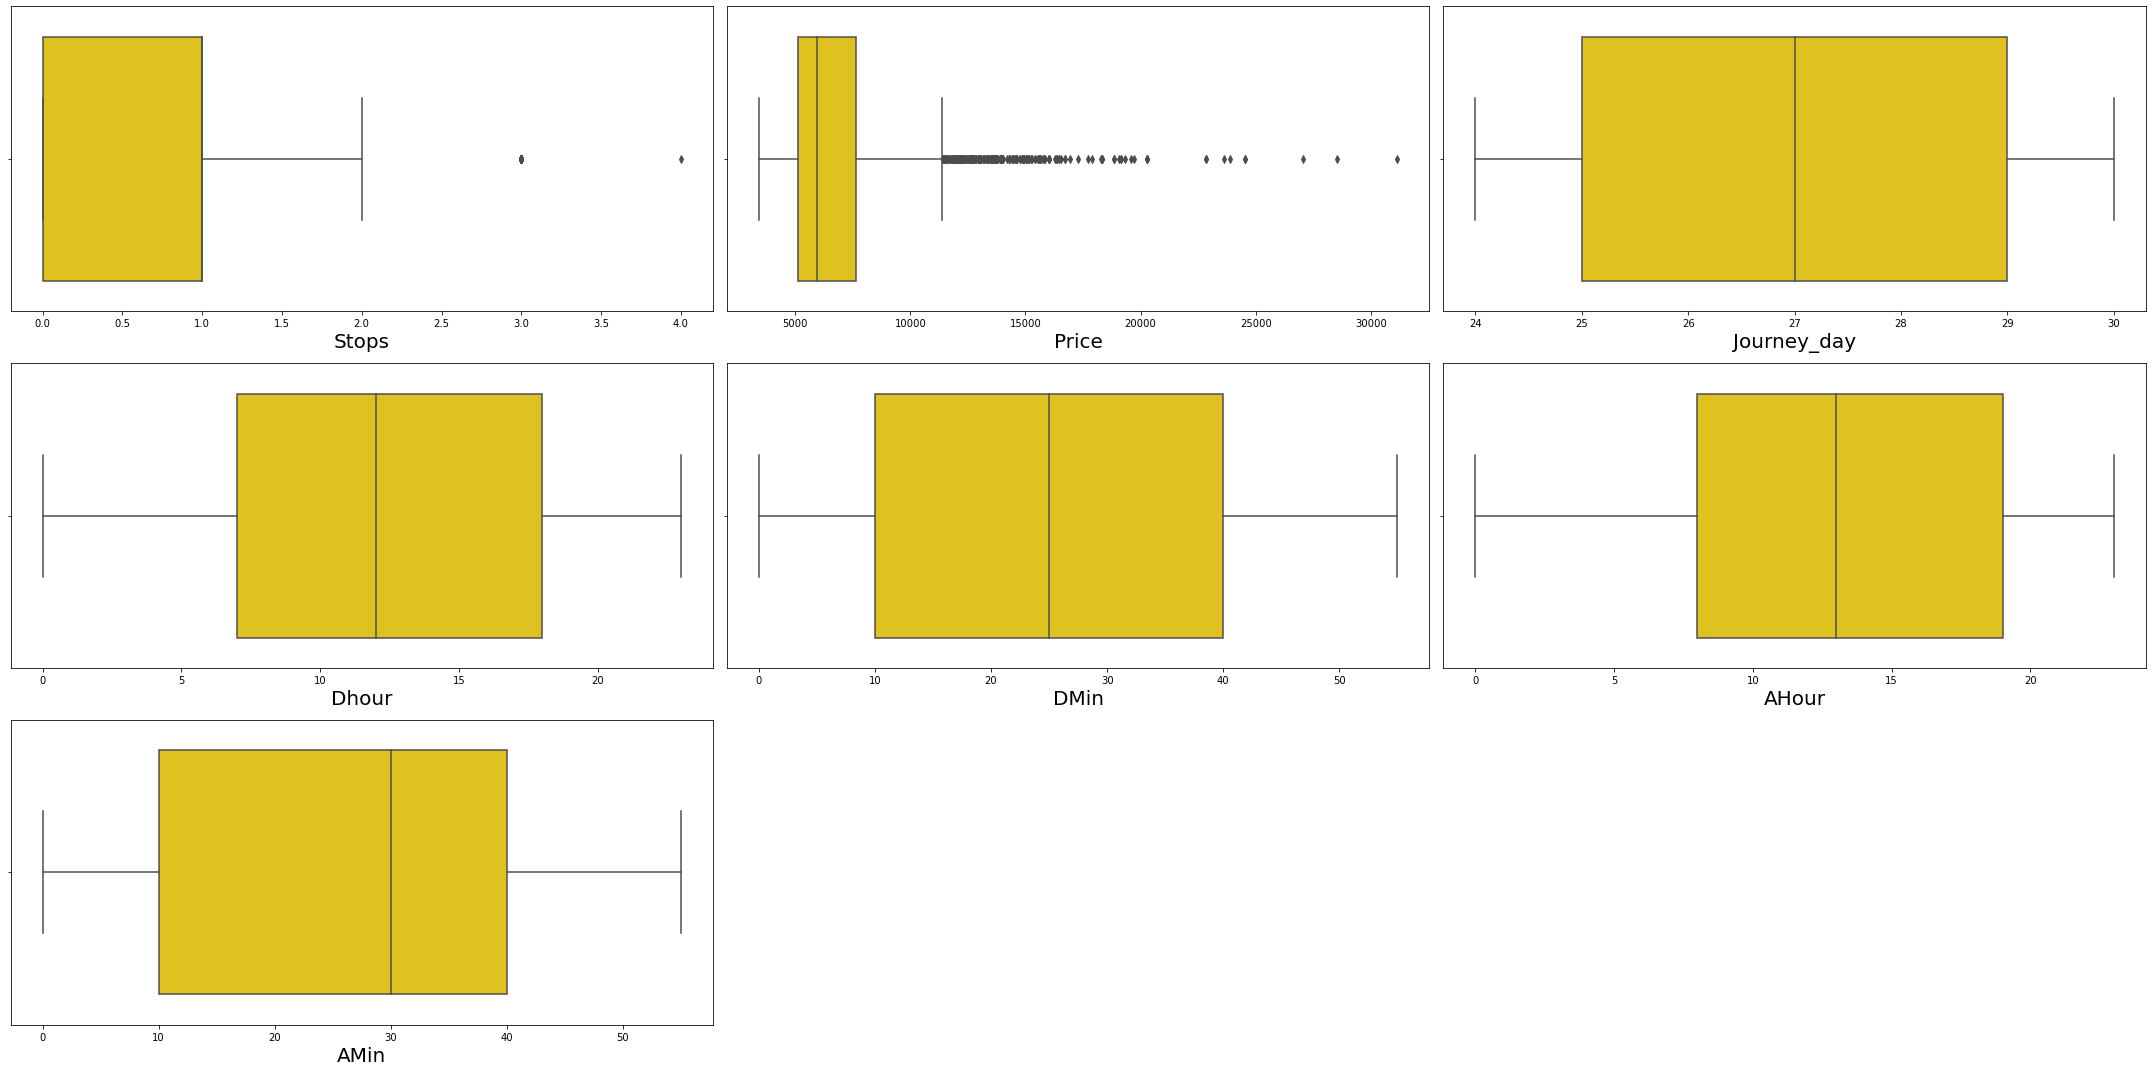

In [126]:
# Identifying the outliers using boxplot

plt.figure(figsize = (30, 15), facecolor = 'white')

plotnumber = 1

for column in numerical_columns:
    if plotnumber <= 9:
        ax=plt.subplot(3, 3, plotnumber)
        sns.boxplot(df[column], color = 'gold')
        plt.xlabel(column, fontsize = 20)
    plotnumber += 1
plt.tight_layout()

There are outliers in Stops, Price.

Since Price is target variable we should not remove outliers from this column. And Stops is a categorical column So we should not remove outliers here too.

# Checking for skewness:

In [127]:
# Check for skewness

df.skew()

Stops          0.659618
Price          2.166729
Journey_day   -0.012994
Dhour          0.015868
DMin           0.107587
AHour         -0.250471
AMin          -0.027810
dtype: float64

There is skewness in Stops and Price. Since Price is our target we should not remove skewness in that column so we don't loose data. And Stops is categorical column so we won't remove skewness in this too.

# Label Encoding

In [128]:
# Separate categorical columns in df_1

cat_col = []

for i in df.dtypes.index:
    if df.dtypes[i] == 'object':
        cat_col.append(i)
print(cat_col)

['Airline', 'From', 'To']


Above are the categorical columns in df.

In [129]:
LE = LabelEncoder()

df[cat_col] = df[cat_col].apply(LE.fit_transform)

In [130]:
df.head()

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
1,5,2,0,0,5315.0,24,8,15,10,25
2,5,2,0,0,5315.0,24,21,5,23,0
3,2,2,0,1,5315.0,24,14,0,18,35
4,2,2,0,1,5315.0,24,13,15,20,25
5,2,2,0,1,5315.0,24,6,40,20,25


Using label encoder we encoded the categorical columns.

# Checking correlation using heat map

In [131]:
cor = df.corr()

cor

,Airline,From,To,Stops,Price,Journey_day,Dhour,DMin,AHour,AMin
Airline,1.000000,0.068539,0.025962,-0.258423,-0.039616,0.002134,-0.044661,0.184257,0.036837,-0.049054
From,0.068539,1.000000,-0.236589,0.051194,0.200997,-0.013849,-0.048770,-0.051594,0.068208,-0.024735
To,0.025962,-0.236589,1.000000,0.045298,0.086125,0.019675,-0.075469,0.012290,0.022515,-0.015172
Stops,-0.258423,0.051194,0.045298,1.000000,0.372672,-0.006573,-0.059203,-0.084063,0.042220,0.028093
Price,-0.039616,0.200997,0.086125,0.372672,1.000000,-0.041830,-0.018444,-0.049541,0.009203,0.004333
Journey_day,0.002134,-0.013849,0.019675,-0.006573,-0.041830,1.000000,-0.002312,-0.010398,0.010633,0.026470
Dhour,-0.044661,-0.048770,-0.075469,-0.059203,-0.018444,-0.002312,1.000000,0.016069,0.112732,0.017932
DMin,0.184257,-0.051594,0.012290,-0.084063,-0.049541,-0.010398,0.016069,1.000000,-0.008772,-0.077638
AHour,0.036837,0.068208,0.022515,0.042220,0.009203,0.010633,0.112732,-0.008772,1.000000,-0.021302
AMin,-0.049054,-0.024735,-0.015172,0.028093,0.004333,0.026470,0.017932,-0.077638,-0.021302,1.000000


Above are the correlations of all the pair of features.To get better visualization on the correlation of features,let me plot it using heat map.

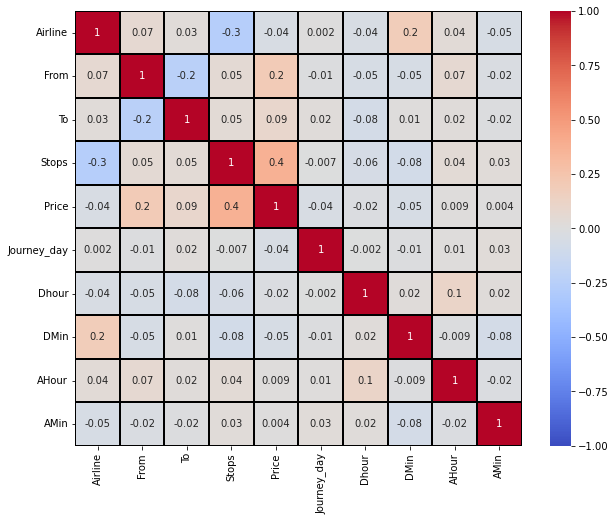

In [132]:
# Visualise the correlation matrix by heat map.

plt.figure(figsize = (10, 8))

sns.heatmap(df.corr(), linewidths = 0.1, vmin = -1, vmax = 1, fmt = '.1g', annot = True, linecolor = 'black', annot_kws = {'size' : 10}, cmap = 'coolwarm')

plt.yticks(rotation = 0);

There is no multicolinearity issue in any features.
AMin is very less correlated with target.

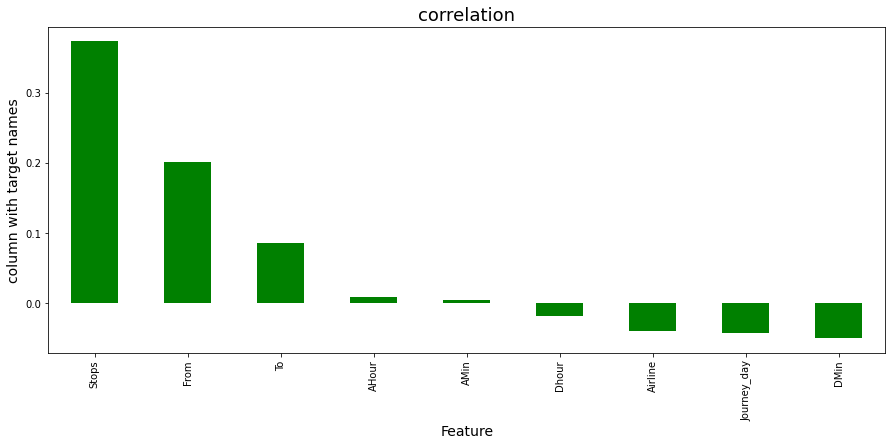

In [133]:
plt.figure(figsize = (15, 6))

df.corr()['Price'].sort_values(ascending = False).drop(['Price']).plot(kind = 'bar', color = 'g')

plt.xlabel('Feature', fontsize = 14)

plt.ylabel('column with target names', fontsize = 14)

plt.title('correlation', fontsize = 18)

plt.show()

AMin is least corelated with target.

# Separating features and label in train dataset:

In [134]:
x = df.drop('Price', axis = 1)

y = df['Price']

# Scaling the data using standard scaler

In [135]:
scaler = StandardScaler()

X = pd.DataFrame(scaler.fit_transform(x), columns = x.columns)

Scaled data using standard scaler.

In [136]:
X.head()

,Airline,From,To,Stops,Journey_day,Dhour,DMin,AHour,AMin
0,1.148553,-0.334434,-1.581111,-1.006046,-1.49182,-0.713157,-0.548480,-0.461524,-0.158977
1,1.148553,-0.334434,-1.581111,-1.006046,-1.49182,1.338880,-1.099395,1.441373,-1.638685
2,-0.425715,-0.334434,-1.581111,0.560688,-1.49182,0.233937,-1.374853,0.709490,0.432906
3,-0.425715,-0.334434,-1.581111,0.560688,-1.49182,0.076088,-0.548480,1.002243,-0.158977
4,-0.425715,-0.334434,-1.581111,0.560688,-1.49182,-1.028855,0.828808,1.002243,-0.158977


This is the data of independent variables after scaling.

# Checking for multicolinearity issue using VIF

In [137]:
vif = pd.DataFrame()

vif['vif_Features'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

vif['Features'] = X.columns

vif

,vif_Features,Features
0,1.124176,Airline
1,1.088967,From
2,1.077445,To
3,1.092173,Stops
4,1.001492,Journey_day
5,1.033146,Dhour
6,1.046837,DMin
7,1.026260,AHour
8,1.010120,AMin


We cannot find multicolinearity issue in this dataset.

# Finding Best Random State and Accuracy:

In [168]:
maxAccu = 0

maxRS = 0

for i in range(1, 200):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = i)
    mod = RandomForestRegressor()
    mod.fit(X_train, y_train)
    pred = mod.predict(X_test)
    acc=r2_score(y_test, pred)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy of ', maxAccu,' at Random_state ',maxRS)

Best accuracy of  0.8067023939602528  at Random_state  44


We got the best accuracy of 80.67% at random state 44.

In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = maxRS)

# Regression Algorithms

# RandomForestRegressor:

In [170]:
RFR = RandomForestRegressor()

RFR.fit(X_train, y_train)

pred = RFR.predict(X_test)

R2_score = r2_score(y_test, pred) * 100

print('R2_score:', R2_score)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 80.54405848158196
mean_squared_error: 1210880.7929020487
mean_absolute_error: 586.5896954028249
root_mean_squared_error: 1100.400287578138


RandomForestRegressor is giving 80.54% r2_score.

# XGB Regressor:

In [171]:
XGB = XGBRegressor()

XGB.fit(X_train, y_train)

pred = XGB.predict(X_test)

R2_score = r2_score(y_test, pred) * 100

print('R2_score:', R2_score)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 79.56952342348205
mean_squared_error: 1271532.9994655694
mean_absolute_error: 678.8862794219951
root_mean_squared_error: 1127.6227203571102


XGB is giving 79.57% r2_score.

# ExtraTreeRegressor:

In [173]:
ETR = ExtraTreesRegressor()

ETR.fit(X_train, y_train)

pred = ETR.predict(X_test)

print('R2_score:', r2_score(y_test, pred) * 100)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 81.61251251432256
mean_squared_error: 1144383.3445457418
mean_absolute_error: 531.0771716848175
root_mean_squared_error: 1069.7585449743983


ETR is giving 81.61% r2_score.

# Gradient Boosting Regressor:

In [145]:
GBR = GradientBoostingRegressor()

GBR.fit(X_train, y_train)

pred = GBR.predict(X_test)

print('R2_score:', r2_score(y_test, pred))

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 0.6569522290095771
mean_squared_error: 2135028.811363014
mean_absolute_error: 951.9882578303844
root_mean_squared_error: 1461.1737786324438


GBR is giving me 65.69% r2_score.

# DecisionTreeRegressor:

In [146]:
DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train)

pred = DTR.predict(X_test)

print('R2_score:', r2_score(y_test, pred))

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 0.6351401069853114
mean_squared_error: 2270781.067745035
mean_absolute_error: 655.8510570147341
root_mean_squared_error: 1506.9111014738178


DTR is giving me 63.51% r2_score.

# KNNeighbors:

In [147]:
knn = KNN()

knn.fit(X_train, y_train)

pred = knn.predict(X_test)

print('R2_score:', r2_score(y_test, pred))

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 0.533572610561355
mean_squared_error: 2902907.4055349133
mean_absolute_error: 1091.6611146700834
root_mean_squared_error: 1703.7920664021515


KNN is giving me 53.35% r2_score.

# Bagging Regressor:

In [148]:
BG = BaggingRegressor()

BG.fit(X_train, y_train)

pred = BG.predict(X_test)

print('R2_score:', r2_score(y_test, pred))

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('root_mean_squared_error:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_score: 0.7959175460240024
mean_squared_error: 1270149.3960285357
mean_absolute_error: 593.4177386290839
root_mean_squared_error: 1127.0090487784628


Bagging Regressor gives 79.59% r2_score.

Random Forest Regressor is the best model with highest r2_score and least errors.

# Hyper Parameter Tuning:

In [161]:
parameter = {'max_features':['auto','sqrt','log2'],
             'min_samples_split':[1,2,3,4],
             'n_estimators':[20,40,60,80,100],
             'min_samples_leaf':[1,2,3,4,5],
              'n_jobs':[-2,-1,1,2]}

In [162]:
GCV = GridSearchCV(ExtraTreesRegressor(), parameter, cv = 5)

In [164]:
GCV.fit(X_train, y_train)

exception calling callback for <Future at 0x206bb7dcaf0 state=finished raised ValueError>
Traceback (most recent call last):
  File "C:\Users\Dinesh Mutha\anaconda3\lib\site-packages\joblib\externals\loky\_base.py", line 625, in _invoke_callbacks
    callback(self)
  File "C:\Users\Dinesh Mutha\anaconda3\lib\site-packages\joblib\parallel.py", line 359, in __call__
    self.parallel.dispatch_next()
  File "C:\Users\Dinesh Mutha\anaconda3\lib\site-packages\joblib\parallel.py", line 794, in dispatch_next
    if not self.dispatch_one_batch(self._original_iterator):
  File "C:\Users\Dinesh Mutha\anaconda3\lib\site-packages\joblib\parallel.py", line 861, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\Dinesh Mutha\anaconda3\lib\site-packages\joblib\parallel.py", line 779, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "C:\Users\Dinesh Mutha\anaconda3\lib\site-packages\joblib\_parallel_backends.py", line 531, in apply_async
    future = self._work

GridSearchCV(cv=5, estimator=ExtraTreesRegressor(),
             param_grid={'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4],
                         'n_estimators': [20, 40, 60, 80, 100],
                         'n_jobs': [-2, -1, 1, 2]})

In [165]:
GCV.best_params_

{'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 3,
 'n_estimators': 60,
 'n_jobs': -1}

In [166]:
Best_mod=ExtraTreesRegressor(max_features = 'auto', min_samples_leaf = 2, min_samples_split = 3, n_estimators = 60, n_jobs = -1)

Best_mod.fit(X_train, y_train)

pred = Best_mod.predict(X_test)

print('R2_Score:', r2_score(y_test, pred) * 100)

print('mean_squared_error:', metrics.mean_squared_error(y_test, pred))

print('mean_absolute_error:', metrics.mean_absolute_error(y_test, pred))

print('RMSE value:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

R2_Score: 82.0123899052075
mean_squared_error: 1119496.1474044484
mean_absolute_error: 553.5752201154957
RMSE value: 1058.0624496713076


After tuning we got 82.01% as r2_score, which increased after hypertuning.

# Saving the model:

In [174]:
# Save the model using .pkl

joblib.dump(Best_mod, 'Flight_Prediction.pkl')

['Flight_Prediction.pkl']

I have saved my model as Flight_Prediction.Using .pkl

# Predicting Flight Price for test dataset using Saved model of trained dataset:

In [175]:
# Loading the saved model
model=joblib.load('Flight_Prediction.pkl')

#Prediction
prediction = model.predict(X_test)
prediction

array([7129.39305556, 7191.82055556, 5106.125     , ..., 5924.74166667,
       5957.01111111, 7709.08722222])

In [176]:
pd.DataFrame([model.predict(X_test)[:], y_test[:]], index = ['Predicted', 'Actual'])

,0,1,2,3,4,5,6,7,8,9,...,1551,1552,1553,1554,1555,1556,1557,1558,1559,1560
Predicted,7129.393056,7191.820556,5106.125,6067.569444,8166.280556,5060.986111,4944.218056,8493.861667,8073.575,6068.908333,...,5018.527778,5597.991667,9740.208095,7638.380556,5207.213889,8738.8225,5981.4,5924.741667,5957.011111,7709.087222
Actual,7671.000000,5566.000000,5061.000,5900.000000,7425.000000,5060.000000,4264.000000,8265.000000,7487.000,5955.000000,...,4845.000000,5109.000000,12089.000000,7626.000000,5178.000000,6018.0000,5937.0,5941.000000,5954.000000,7626.000000


Above are the predicted values and the actual values.They are almost similar.

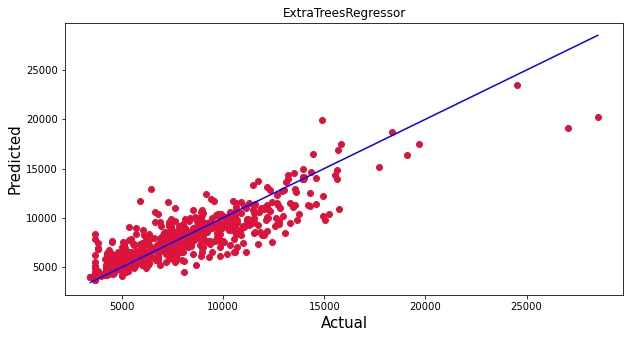

In [178]:
plt.figure(figsize = (10, 5))

plt.scatter(y_test, prediction, c='crimson')

p1 = max(max(prediction), max(y_test))

p2 = min(min(prediction), min(y_test))

plt.plot([p1, p2], [p1, p2], 'b-')

plt.xlabel('Actual', fontsize=15)

plt.ylabel('Predicted', fontsize=15)

plt.title('ExtraTreesRegressor')

plt.show()

Plotting Actual vs Predicted. Blue line is the actual line and red dots are the predicted values.